# REPORTE 10

## Alexander Du-Bois Arana

## Código: 20200323

### Lectura

La lectura de Bell et al. busca reponder a la pregunta acerca de qué factores determinan que una persona se convierta en un inventor en EEUU. Para responder a ello, los autores combinan dos bases de datos con 1.2 millones de usuarios: una acerca de los aplicantes a patentes entre 1996 y 2014, y otra del pago de impuestos federales. Gracias a esto, los autores realizan un seguimiento de la vida de estos inventores para compararlos e identificar qué afecta mayor a su éxito en el futuro: si su capacidad inventiva innata o el ambiente donde se criaron, es decir, sus características de nacimiento, como el nivel socioeconómico, su raza, o su género.

Una fortaleza de su investigación es que toma en cuenta que estos factores de crianza no son únicos para los inventores, sino que afectan el éxito en general de los futuros profesiones.. Esto podría generar problemas, ya que podrían existir variable contrafactuales que explican específicamente las razones que llevan a uno a volverse inventor. Pero los autores toman esto en cuenta, y encuentran además que dentro de los factores de la crianza, la zona donde uno nace, y la cercanía a otros inventores o núcleos de invención desde pequeño afecta tomar esta decisión profesional. Por lo tanto, el trabajo logra demostrar que estos factores de crianza si tienen un aspecto único para los inventores, ya que incluso el área donde se innova tiene una correlación con el tipo de inventos o patentes del lugar donde se nace.

Por otro lado, se puede identificar como una debilidad que no se tomen en cuenta factores intelectuales para evidenciar la propensión a volverse inventor. Es verdad que los factores estructurales juegan un papel importante, pero también sería importante conocer las capacidades de los jóvenes y su nivel intelectual para llevar a cabo estos planes futuros, así como el nivel educativo de los padres y su propio rendimiento, que también pueden tener un papel importante. 

Este trabajo resulta muy importante ya que analiza los factores que llevan a crear inventores. En primer lugar, el trabajo confirma que los factores de nacimiento son altamente predictivos para evidenciar si una persona se volverá inventor. Esto se incrementa si uno proviene de una familia de altos ingresos, si es de raza blanca, y además si uno es hombre. Estas desigualdades permiten evidenciar que existe un campo desventajoso para las personas opuestas a estas características, lo que podría significar también que muchas de las mentes más brillantes no tienen las capacidades para salir a la luz. En segundo lugar, el trabajo logra encontrar un efecto causal entre la exposición a la inovación en la infancia entre sus seres cercanos, con volverse un inventor en el futuro. Y esta causalidad se extiende también al tipo de innovación a la que uno se expone, que luego será por la cuál el niño o niña se interesará profesionalmente. Asimismo, este trabajo colabora con diversas literaturas. Por ejemplo, permite expandir nuestro conocimiento acerca de los factores que llevan a que los jóvenes elijan ciertas carreras universitarias. Además, el trabajo es un gran ejemplo de cómo el talento es solamente encontrado y explotado cuando existen condiciones del entorno que lo permitan, por lo que las brechas de desigualdad aumentan.

Para seguir investigando acerca de estos temas, creo que un área interesante sería observar si existen propuestas de políticas públicas o proyectos del gobierno para promover las innovaciones y los inventos. Esto podría relacionarse con los factores estructurales, y se podría observar si el trabajo del Estado tiene algún efecto sobre la decisión de volverse inventor. Asimismo, existen trabajos que han analizado la desigualdad que la innovación presenta. Por ejemplo, el trabajo de Aghion er al. (2018), analiza cómo la innovación fomenta brechas de ingresos entre los más ricos, y demuestra también que la innovación está fuertemente asociada con la movilidad social. Pero otros autores, como Frey (2019), explican que debería de existir precaución frente a nuevas formas de innovación, ya que estas traerían aún mayores desigualdades y acceso a menos empleos, por causa de la inteligencia artificial y la automatización.

Bibliografía:

- Aghion, P., Akcigit, U., Bergeaud, A., Blundell, R., & Hémous, D. (2019). Innovation and top income inequality. The Review of Economic Studies, 86(1), 1-45.

- Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713.

- Frey, C. B. (2019). The technology trap. In The Technology Trap. Princeton University Press.

### Código

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

#### Explique de manera muy breve y resumida en qué consiste una regresión discontinua.
Una regresión discontinua es un método de identificación causal sin aleatorización, que consiste en comparar los resultados de dos grupos a ambos lados de un umbral, es decir, comparar a dos grupos que se dividen por una discontinuidad en el curso natural de las cosas (el umbral) que sirve como tratamiento. El supuesto fundamental es que ambos grupos deben ser muy parecidos, y este umbral debe ser quien los diferencie. Por lo tanto, se puede comparar a aquellos por encima y por debajo del umbral por medio de una "running variable", que es la variable que se usará para definir a ambos grupos; un "cut off", que es el valor de esta variable o la categoría que determina si eres tratamiento o control; y un "bandwidth", que es el rango de casos a ambos lados del umbral que se usará en la muestra.

#### Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.

Por ejemplo, durante la pandemia, se podría realizar una regresión discontinua con el uso de las mascarillas y las disposiciones del gobierno. Por ejemplo, recientemente, se podría tomar como umbral el decreto supremo del gobierno sobre el uso opcional de las mascarillas en espacios cerrados. Y tomando como disrrupción a ese hecho, se podría comparar los contagios de covid antes y despúes de esa medida.

#### Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).

El "Sharp Design" para una regresión discontinua consiste en que la probabilidad de pertencer al grupo de tratamiento pasa de 0% al 100% (de 0 a 1) cuando uno cruza el umbral. Por ejemplo, se podría utilizar una regresión discontinua para medir el impacto de un programa de becas que solo se aplica a un grupo de personas. Este grupo de personas obtiene la beca debido a que obtuvo una calificación específica en un examen, por ejemplo, 700 de 1000 puntos como mínimo. Por lo tanto, obtener 700 puntos podría ser nuestro umbral para observar quienes obtuvieron la beca o no.

### Aplicaciones

#### Y = 15 + 22D + 2.5X + E

In [2]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

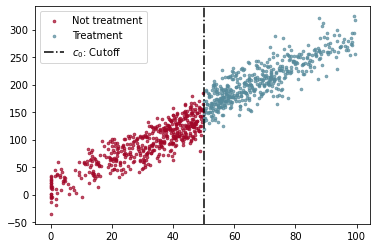

In [3]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [4]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

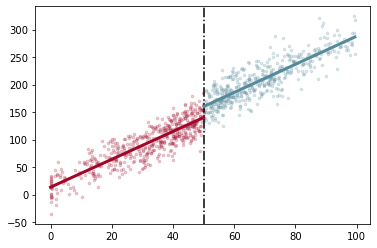

In [5]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [9]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 20.23


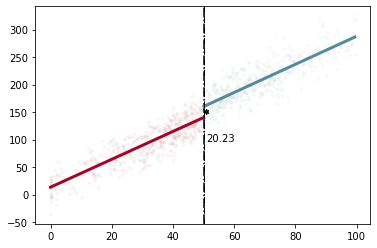

In [10]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

#### Y = 12 + 60D + 1.3X + E

In [11]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

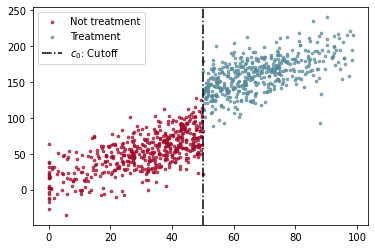

In [12]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [13]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

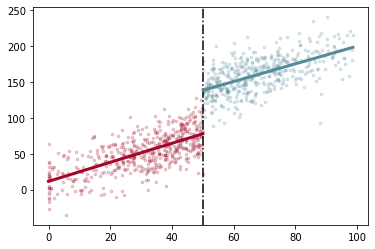

In [14]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [15]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 60.65


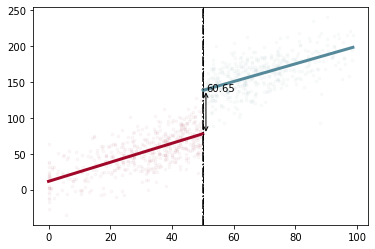

In [16]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));